In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pred_coreset as pc
import pymc as pm
import torch
import ot
import Discrepancy as dc
from scipy.special import expit

Generate data from logistic regression

In [83]:
np.random.seed(1)


#10,000 datapoints, 10 covariates
N = 10000
P = 2

x = np.random.normal(0, 5, N)
# they used the same parameters: 3
th = 0.5
# Compute logistic scores and sample bernoulli
ps = expit(1 + x*th)
y =(np.random.rand(N) <= ps).astype(int)
#y[y==0] = -1

Get the coreset with out method

In [3]:
## Create discrepancy

ot_2d = dc.Discrepancy(ot.dist, p=1)

core_x =  torch.from_numpy(x[torch.randint(0, len(x), (50,))])

ws = pc.get_coreset(torch.from_numpy(x), 500, core_x, 1, mixt.mixt, 1, parallel = True)

NameError: name 'torch' is not defined

Fit model with full data

In [84]:
with pm.Model() as logistic_model:
    # random variables for coefficients with
    # uninformative priors for each parameter

    intercept = pm.Normal('intercept', 0, 1)
    beta = pm.Normal('beta', 0, 1)

    # Transform random variables into vector of probabilities p(y_i=1)
    # according to logistic regression model specification.
    likelihood = pm.invlogit(intercept + beta * x)

    # Bernoulli random vector with probability of success
    # given by sigmoid function and actual data as observed
    pm.Bernoulli(name='logit', p=likelihood, observed=y)

In [85]:
with logistic_model:
    full_fit = pm.fit()

Finished [100%]: Average Loss = 4,032.1


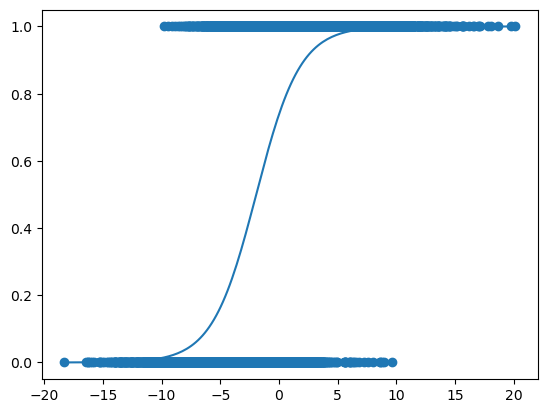

In [86]:
beta = full_fit.sample(1000).posterior["beta"].values.mean()
intercept = full_fit.sample(1000).posterior["intercept"].values.mean()

logit_x = np.linspace(x.min(), x.max(), 200) 

plt.scatter(x, y)
plt.plot(logit_x, expit(intercept + beta * logit_x))
plt.show()


In [78]:
full_fit.sample(1000).posterior["beta"].values.mean()

0.5050113839954216